In [1]:
import math

import numpy as np
from numpy.random import choice

import pandas as pd

from scipy.stats import gamma, expon
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
def exponential_random_number(lmbd):
    return expon.rvs(loc=loc_premium, scale=1/lmbd, size=1)
exponential_random_number = np.vectorize(exponential_random_number)

#### Gamma Distribution: a candidate for the Brand Points Distribution
For more info on Exponential Distribution, check the wikipedia. https://en.wikipedia.org/wiki/Gamma_distribution

In [2]:
# Parameters of the Distribution
shape=2
scale = 5
loc = 0

mean, var, skew, kurt = gamma.stats(a=shape,scale=scale, moments='mvsk')
print('average value: {},\nvariance: {}'.format(mean, var))

average value: 10.0,
variance: 50.0


Brand Points Distribution Graph


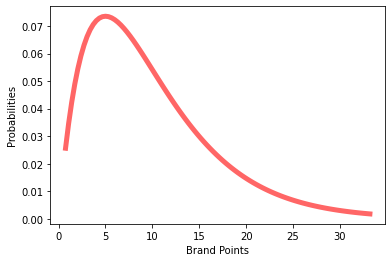

Average Brand Points: 10.0


In [3]:
# The graph of the pdf of the Gamma Distribution
fig, ax = plt.subplots(1, 1)
x = np.linspace(gamma.ppf(0.01, a=shape, loc=loc, scale=scale),
                gamma.ppf(0.99, a=shape, loc=loc, scale=scale), 100)
ax.plot(x, gamma.pdf(x, a=shape, loc=loc, scale=scale),
       'r-', lw=5, alpha=0.6, label='gamma pdf')
print('Brand Points Distribution Graph')
plt.xlabel('Brand Points')
plt.ylabel('Probabilities')
plt.show()
print('Average Brand Points: {}'.format(mean))

#### Exponential Distribution: a candidate for the price premium rate
For more info on Exponential Distribution, check the wikipedia.
https://en.wikipedia.org/wiki/Exponential_distribution

In [4]:
## Parameters of Exponential Distribution
lmbd = 5             # lambda
scale = 1/lmbd       # scale
loc = 1              # location

mean, var, skew, kurt = expon.stats(scale=scale, loc=loc, moments='mvsk')
print('average value: {:5.2f},\nvariance: {:5.2f}'.format(mean, var))

average value:  1.20,
variance:  0.04


Price Premium Rate Distribution Graph


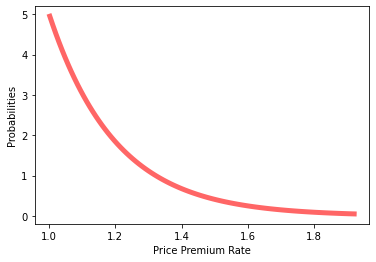

Average Premium Rate: 1.2


In [5]:
# The graph of the pdf of the Exponential Distribution
fig, ax = plt.subplots(1, 1)
x = np.linspace(expon.ppf(0.01, scale=scale, loc=loc),
                expon.ppf(0.99, scale=scale, loc=loc), 100)
ax.plot(x, expon.pdf(x, scale=scale, loc=loc),
       'r-', lw=5, alpha=0.6, label='expon pdf')
print('Price Premium Rate Distribution Graph')
plt.xlabel('Price Premium Rate')
plt.ylabel('Probabilities')
plt.show()
print('Average Premium Rate: {}'.format(mean))

## Mature Community
- The community has matured enough that the Brand points are given by a **Gamma** distribution.
- And the price premium rates are given by an **exponential** distribution, dependent of the Brand points. The dependency is described by the relation between Brand point and the parameter lambda of the exponential function, i.e., the person with Brand point **p** would set the price premium rate by average 1+1/**p**.

$$
\mathrm{Price\;Premium} \sim \mathcal{Exponential\;Distribution}\left( \lambda = \mathrm{Brand\;Point} \right)
$$

| Input | Distribution |
| :-: | :-: |
| Brand Points | **Gamma Distribution** |
| Price Premium Rates | **Exponential Distribution** |

The following are the experiments on a variety of ways that "Brand points" influence the likelihood.

#### Case Study: quadratic Brand Points
$$
\mathrm{Likelihood\;Value} = \mathrm{Brand\;Points}^2 \times \sqrt{\mathrm{Price\;Premium\;Rate}}
$$
There are 5000 tickets in the raffle and only 100 tickets will be selected with likelihoods determined by the above formula.

In [13]:
no_tickets = 5000
no_selections = 100

#### Generating the scenery

The Brand points of 5000 Ticket holders are generated randomly by Gamma Distribution with shape 1 and scale 2.

And the price premium rates are generated randomly, independent of Brand points, by Exponential Distribution with pameter lambda 5.

| Input | Distribution | Parameters |
| :-: | :-: | :-: |
| Brand Points | Gamma Distribution | shape = 1; scale = 2  |
| Price Premium Rates | Exponential Distribution | lambda = (Brand Point)<sup>1/2</sup> |

In [21]:
# Parameter for Brand Points Distribution, Gamma Distribution
shape_points = 1
scale_points = 2
loc_points = 0 # 

# Parameter for Price Premium Rate Distribution, Exponential Distribution
loc_premium = 1

In [35]:
# Generate the Points for 5000 ticket holders
Points = gamma.rvs(a=shape_points,loc=loc_points,scale=scale_points,size=no_tickets)

# Generating the price premium rate for 5000 ticket holders. independently of "points".
Price_Premium_Rates = exponential_random_number(np.sqrt(Points))

# Likelihood_Values = Points * Price_Premium_Rates
Likelihood_Values = Points**2 * np.sqrt(Price_Premium_Rates) # First calculate each tickets own value
Likelihood_Values = Likelihood_Values / Likelihood_Values.sum() # Second calibrate likelihood values to have the sum of all to be 1.

# Put all the values into a data frame with 'color' column being 'b'.
df = pd.DataFrame(data={'point':Points,'premium_rate':Price_Premium_Rates,'likelihood':Likelihood_Values,'result':'not chosen'})

In [36]:
df_summary = pd.DataFrame()
df_summary.loc[:,'mean'] = df[['point','premium_rate','likelihood']].mean()
df_summary.loc[:,'max'] = df[['point','premium_rate','likelihood']].max()
df_summary.loc[:,'min'] = df[['point','premium_rate','likelihood']].min()
df_summary

,mean,max,min
point,2.078289,17.885675,8.888989e-05
premium_rate,2.187373,38.034076,1.000135e+00
likelihood,0.000200,0.007348,4.095253e-13


##### Selection of 100 tickets out of 5000

In [38]:
# Choose 100 tickets out of 1000 with the likelihood given by Likelihood_Values
draw = np.random.choice([n for n in range(no_tickets)], no_selections, replace=False, p=Likelihood_Values)

# Change the colors of the chosen tickets to red 'r'
for idx in draw:
    df.loc[idx,'result'] = 'chosen'

#### Scatter Plots of brand points and price premium rate

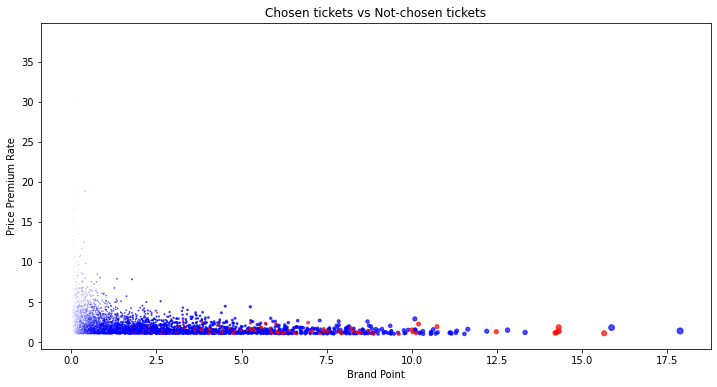

In [40]:
fig, ax = plt.subplots(figsize=(12,6))
for result in ['not chosen','chosen']:
    color = 'b' if result=='not chosen' else 'r'
    # scatter = ax.scatter(df[df['result']==result]['point'], df[df['result']==result]['premium_rate'], c=color, label=result, alpha=0.7,cmap='viridis')
    scatter = ax.scatter(df[df['result']==result]['point'], df[df['result']==result]['premium_rate'], c=color, s=5000*df[df['result']==result]['likelihood'], label=result, alpha=0.7,cmap='viridis')
ax.set_title('Chosen tickets vs Not-chosen tickets')
ax.set_xlabel('Brand Point')
ax.set_ylabel('Price Premium Rate')
# ax.legend()
plt.show()

#### Points, Premium Rate and Likelihood for chosens and not-chosens

In [41]:
df.groupby('result').agg({'point':['mean','max','min'],'premium_rate':['mean','max','min']})

point                      premium_rate                     
                mean        max       min         mean        max       min
result                                                                     
chosen      5.677191  15.654332  0.709806     1.473088   3.688016  1.002052
not chosen  2.004842  17.885675  0.000089     2.201950  38.034076  1.000135

##### Point Distribution of 'chosen'

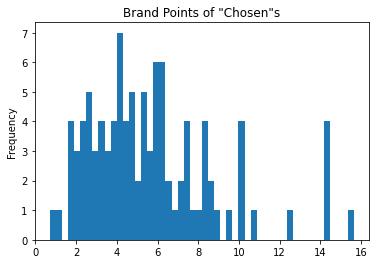

In [42]:
df[df['result']=='chosen']['point'].plot.hist(bins=50)
plt.title('Brand Points of "Chosen"s')
plt.show()

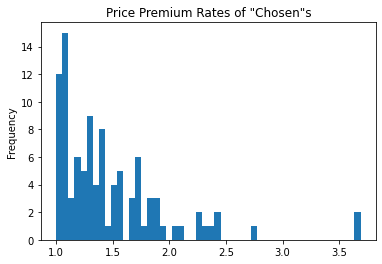

In [43]:
df[df['result']=='chosen']['premium_rate'].plot.hist(bins=50)
plt.title('Price Premium Rates of "Chosen"s')
plt.show()

#### Results Analysis

In [44]:
df_result_summary = pd.concat([pd.cut(df['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='not chosen']['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='chosen']['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts()],
                       axis=1)
df_result_summary.columns = ['total','not chosen','chosen']
df_result_summary['winning_rates'] = df_result_summary['chosen'] / df_result_summary['total']
df_result_summary['winning_rates'] = df_result_summary['winning_rates'].fillna(0)

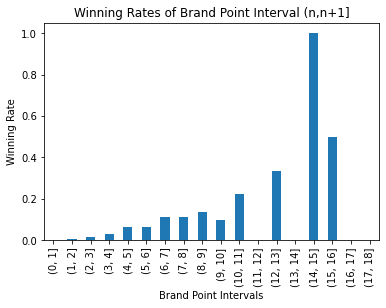

In [45]:
df_result_summary['winning_rates'].plot.bar()
plt.xlabel('Brand Point Intervals')
plt.ylabel('Winning Rate')
plt.title('Winning Rates of Brand Point Interval (n,n+1]')
plt.show()

In [47]:
df_result_summary#.head()

,total,not chosen,chosen,winning_rates
"(0, 1]",1896,1895,1,0.000527
"(1, 2]",1174,1169,5,0.004259
"(2, 3]",775,761,14,0.018065
"(3, 4]",425,413,12,0.028235
"(4, 5]",262,245,17,0.064885
"(5, 6]",184,172,12,0.065217
"(6, 7]",107,95,12,0.112150
"(7, 8]",70,62,8,0.114286
"(8, 9]",51,44,7,0.137255
"(9, 10]",20,18,2,0.100000


#### Practical Cases: cubic
$$
\mathrm{Likelihood Value} = \mathrm{Brand Points}^3 \times \sqrt{\mathrm{Price Premium Rate}}
$$
There are 5000 tickets in the raffle and only 100 tickets will be selected with likelihoods determined by the above formula.

In [21]:
no_tickets = 5000
no_selections = 100

#### Generating the scenery

The Brand points of 5000 Ticket holders are generated randomly by Gamma Distribution with shape 1 and scale 2.

And the price premium rates are generated randomly, independent of Brand points, by Exponential Distribution with pameter lambda 5.

|  | Distribution | Parameters |
| :-: | :-: | :-: |
| Brand Points | Gamma Distribution | shape = 1; scale = 2  |
| Price Premium Rates | Exponential Distribution | lambda = (Brand Point)<sup>0.5</sup> |

In [50]:
# Parameter for Brand Points Distribution, Gamma Distribution
shape_points = 1
scale_points = 2
loc_points = 0 # 

# Parameter for Price Premium Rate Distribution, Exponential Distribution
loc_premium = 1

In [51]:
# Generate the Points for 5000 ticket holders
Points = gamma.rvs(a=shape_points,loc=loc_points,scale=scale_points,size=no_tickets)

# Generating the price premium rate for 5000 ticket holders. independently of "points".
Price_Premium_Rates = exponential_random_number(np.sqrt(Points))

# Likelihood_Values = Points * Price_Premium_Rates
Likelihood_Values = Points**3 * np.sqrt(Price_Premium_Rates) # First calculate each tickets own value
Likelihood_Values = Likelihood_Values / Likelihood_Values.sum() # Second calibrate likelihood values to have the sum of all to be 1.

# Put all the values into a data frame with 'color' column being 'b'.
df = pd.DataFrame(data={'point':Points,'premium_rate':Price_Premium_Rates,'likelihood':Likelihood_Values,'result':'not chosen'})

In [52]:
df_summary = pd.DataFrame()
df_summary.loc[:,'mean'] = df[['point','premium_rate','likelihood']].mean()
df_summary.loc[:,'max'] = df[['point','premium_rate','likelihood']].max()
df_summary.loc[:,'min'] = df[['point','premium_rate','likelihood']].min()
df_summary

,mean,max,min
point,1.995714,21.193007,4.018013e-04
premium_rate,2.245572,87.534117,1.000028e+00
likelihood,0.000200,0.037855,1.834619e-15


##### Selection of 100 tickets out of 5000

In [53]:
# Choose 100 tickets out of 1000 with the likelihood given by Likelihood_Values
draw = np.random.choice([n for n in range(no_tickets)], no_selections, replace=False, p=Likelihood_Values)

# Change the colors of the chosen tickets to red 'r'
for idx in draw:
    df.loc[idx,'result'] = 'chosen'

#### Scatter Plots of brand points and price premium rate

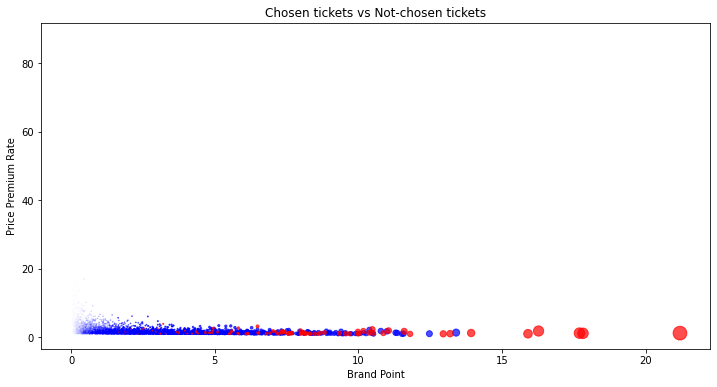

In [54]:
fig, ax = plt.subplots(figsize=(12,6))
for result in ['not chosen','chosen']:
    color = 'b' if result=='not chosen' else 'r'
    # scatter = ax.scatter(df[df['result']==result]['point'], df[df['result']==result]['premium_rate'], c=color, label=result, alpha=0.7,cmap='viridis')
    scatter = ax.scatter(df[df['result']==result]['point'], df[df['result']==result]['premium_rate'], c=color, s=5000*df[df['result']==result]['likelihood'], label=result, alpha=0.7,cmap='viridis')
ax.set_title('Chosen tickets vs Not-chosen tickets')
ax.set_xlabel('Brand Point')
ax.set_ylabel('Price Premium Rate')
# ax.legend()
plt.show()

#### Points, Premium Rate and Likelihood for chosens and not-chosens

In [55]:
df.groupby('result').agg({'point':['mean','max','min'],'premium_rate':['mean','max','min']})

point                      premium_rate                     
                mean        max       min         mean        max       min
result                                                                     
chosen      7.219944  21.193007  1.647625     1.467378   3.953628  1.008859
not chosen  1.889097  13.397935  0.000402     2.261454  87.534117  1.000028

##### Point Distribution of 'chosen'

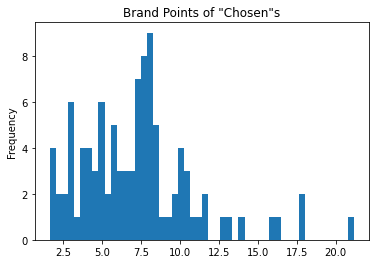

In [56]:
df[df['result']=='chosen']['point'].plot.hist(bins=50)
plt.title('Brand Points of "Chosen"s')
plt.show()

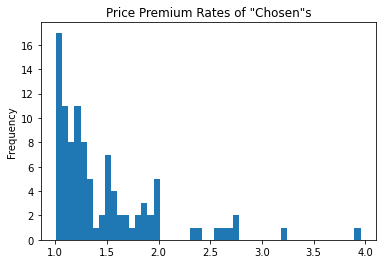

In [57]:
df[df['result']=='chosen']['premium_rate'].plot.hist(bins=50)
plt.title('Price Premium Rates of "Chosen"s')
plt.show()

#### Results Analysis

In [58]:
df_result_summary = pd.concat([pd.cut(df['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='not chosen']['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='chosen']['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts()],
                       axis=1)
df_result_summary.columns = ['total','not chosen','chosen']
df_result_summary['winning_rates'] = df_result_summary['chosen'] / df_result_summary['total']
df_result_summary['winning_rates'] = df_result_summary['winning_rates'].fillna(0)

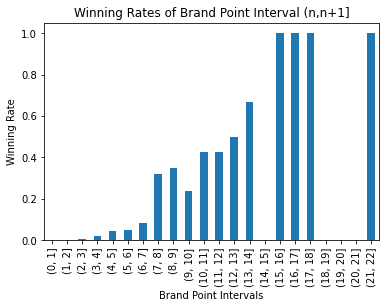

In [59]:
df_result_summary['winning_rates'].plot.bar()
plt.xlabel('Brand Point Intervals')
plt.ylabel('Winning Rate')
plt.title('Winning Rates of Brand Point Interval (n,n+1]')
plt.show()

In [60]:
df_result_summary#.head()

,total,not chosen,chosen,winning_rates
"(0, 1]",1956,1956,0,0.000000
"(1, 2]",1218,1214,4,0.003284
"(2, 3]",708,702,6,0.008475
"(3, 4]",457,448,9,0.019694
"(4, 5]",259,247,12,0.046332
"(5, 6]",161,153,8,0.049689
"(6, 7]",96,88,8,0.083333
"(7, 8]",56,38,18,0.321429
"(8, 9]",37,24,13,0.351351
"(9, 10]",21,16,5,0.238095


#### Practical Cases: exponential

$$
\mathrm{Likelihood Value} = \exp\big(Brand Points\big) \times \sqrt{\mathrm{Price Premium Rate}}
$$
There are 5000 tickets in the raffle and only 100 tickets will be selected with likelihoods determined by the above formula.

In [33]:
no_tickets = 5000
no_selections = 100

#### Generating the scenery

The Brand points of 5000 Ticket holders are generated randomly by Gamma Distribution with shape 1 and scale 2.

And the price premium rates are generated randomly, independent of Brand points, by Exponential Distribution with pameter lambda 5.

|  | Distribution | Parameters |
| :-: | :-: | :-: |
| Brand Points | Gamma Distribution | shape = 1; scale = 2  |
| Price Premium Rates | Exponential Distribution | lambda = (Brand Point)<sup>0.5</sup> |

In [61]:
# Parameter for Brand Points Distribution, Gamma Distribution
shape_points = 1
scale_points = 2
loc_points = 0 # 

# Parameter for Price Premium Rate Distribution, Exponential Distribution
loc_premium = 1

In [62]:
# Generate the Points for 5000 ticket holders
Points = gamma.rvs(a=shape_points,loc=loc_points,scale=scale_points,size=no_tickets)

# Generating the price premium rate for 5000 ticket holders. independently of "points".
Price_Premium_Rates = exponential_random_number(np.sqrt(Points))

# Likelihood_Values = Points * Price_Premium_Rates
Likelihood_Values = np.exp(Points) * np.sqrt(Price_Premium_Rates) # First calculate each tickets own value
Likelihood_Values = Likelihood_Values / Likelihood_Values.sum() # Second calibrate likelihood values to have the sum of all to be 1.

# Put all the values into a data frame with 'color' column being 'b'.
df = pd.DataFrame(data={'point':Points,'premium_rate':Price_Premium_Rates,'likelihood':Likelihood_Values,'result':'not chosen'})

In [63]:
df_summary = pd.DataFrame()
df_summary.loc[:,'mean'] = df[['point','premium_rate','likelihood']].mean()
df_summary.loc[:,'max'] = df[['point','premium_rate','likelihood']].max()
df_summary.loc[:,'min'] = df[['point','premium_rate','likelihood']].min()
df_summary

,mean,max,min
point,1.992073,22.705917,3.036191e-05
premium_rate,2.248731,311.611883,1.000125e+00
likelihood,0.000200,0.987880,1.283019e-10


##### Selection of 100 tickets out of 5000

In [64]:
# Choose 100 tickets out of 1000 with the likelihood given by Likelihood_Values
draw = np.random.choice([n for n in range(no_tickets)], no_selections, replace=False, p=Likelihood_Values)

# Change the colors of the chosen tickets to red 'r'
for idx in draw:
    df.loc[idx,'result'] = 'chosen'

#### Scatter Plots of brand points and price premium rate

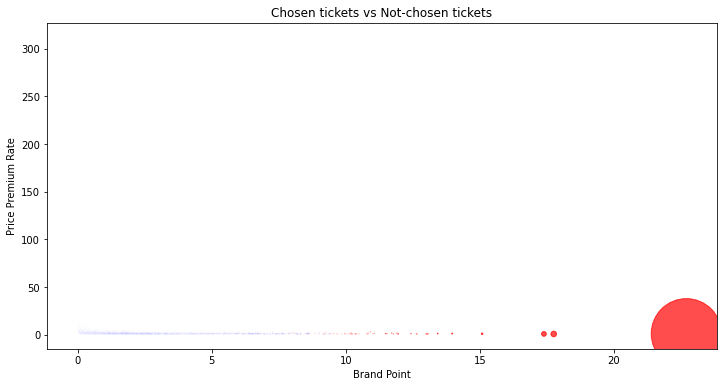

In [65]:
fig, ax = plt.subplots(figsize=(12,6))
for result in ['not chosen','chosen']:
    color = 'b' if result=='not chosen' else 'r'
    # scatter = ax.scatter(df[df['result']==result]['point'], df[df['result']==result]['premium_rate'], c=color, label=result, alpha=0.7,cmap='viridis')
    scatter = ax.scatter(df[df['result']==result]['point'], df[df['result']==result]['premium_rate'], c=color, s=5000*df[df['result']==result]['likelihood'], label=result, alpha=0.7,cmap='viridis')
ax.set_title('Chosen tickets vs Not-chosen tickets')
ax.set_xlabel('Brand Point')
ax.set_ylabel('Price Premium Rate')
# ax.legend()
plt.show()

#### Points, Premium Rate and Likelihood for chosens and not-chosens

In [66]:
df.groupby('result').agg({'point':['mean','max','min'],'premium_rate':['mean','max','min']})

point                      premium_rate                      
                mean        max       min         mean         max       min
result                                                                      
chosen      8.861293  22.705917  0.114778     1.503413    4.131180  1.003718
not chosen  1.851885   9.418633  0.000030     2.263941  311.611883  1.000125

##### Point Distribution of 'chosen'

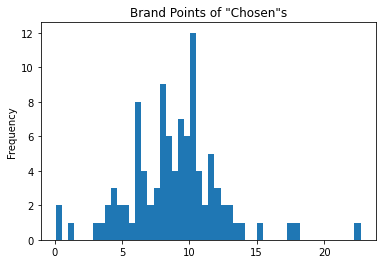

In [67]:
df[df['result']=='chosen']['point'].plot.hist(bins=50)
plt.title('Brand Points of "Chosen"s')
plt.show()

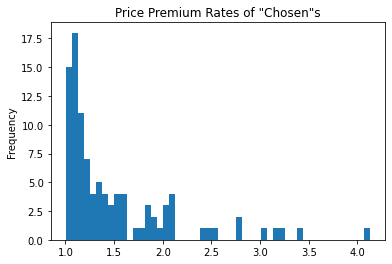

In [68]:
df[df['result']=='chosen']['premium_rate'].plot.hist(bins=50)
plt.title('Price Premium Rates of "Chosen"s')
plt.show()

#### Results Analysis

In [69]:
df_result_summary = pd.concat([pd.cut(df['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='not chosen']['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='chosen']['point'],bins=[n for n in range(1+math.ceil(df['point'].max()))]).value_counts()],
                       axis=1)
df_result_summary.columns = ['total','not chosen','chosen']
df_result_summary['winning_rates'] = df_result_summary['chosen'] / df_result_summary['total']
df_result_summary['winning_rates'] = df_result_summary['winning_rates'].fillna(0)

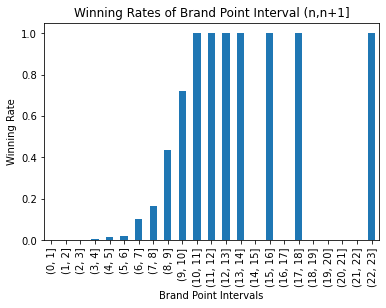

In [70]:
df_result_summary['winning_rates'].plot.bar()
plt.xlabel('Brand Point Intervals')
plt.ylabel('Winning Rate')
plt.title('Winning Rates of Brand Point Interval (n,n+1]')
plt.show()

In [71]:
df_result_summary#.head()

,total,not chosen,chosen,winning_rates
"(0, 1]",1963,1961,2,0.001019
"(1, 2]",1251,1250,1,0.000799
"(2, 3]",684,683,1,0.001462
"(3, 4]",414,411,3,0.007246
"(4, 5]",278,273,5,0.017986
"(5, 6]",153,150,3,0.019608
"(6, 7]",115,103,12,0.104348
"(7, 8]",55,46,9,0.163636
"(8, 9]",32,18,14,0.437500
"(9, 10]",18,5,13,0.722222
